#🧠 Fraud Guardian - 00_data_exploration.ipynb
#Author: Diego Ferreira
#Description: Exploratory Data Analysis (EDA) for Credit Card Fraud Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [3]:
# Load dataset
DATA_PATH = "../data/raw/creditcard.csv" 
df = pd.read_csv(DATA_PATH)

print("✅ Dataset loaded successfully.")
print(f"Shape: {df.shape}")
df.head()


✅ Dataset loaded successfully.
Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Basic overview
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
# Statistical summary
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
# Check missing values
missing = df.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

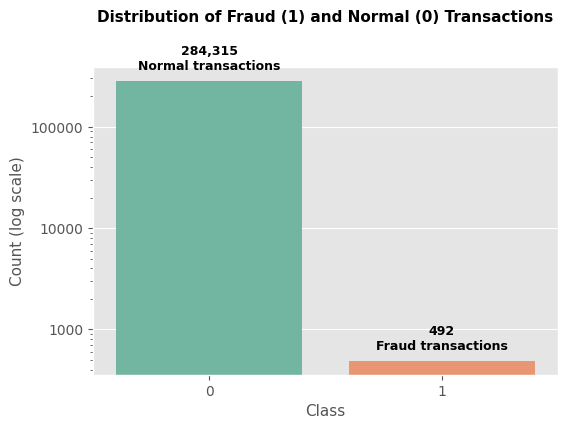

💰 Fraudulent transactions: 0.1727%


In [37]:
# Distribuição de classes
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Figura
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class', hue='Class', palette='Set2', legend=False)

# Escala logarítmica e formatação dos números do eixo Y
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')

# Título e rótulos — com mais espaço acima
plt.title(
    "Distribution of Fraud (1) and Normal (0) Transactions\n",
    fontsize=11,
    fontweight='bold',
    pad=20  # adiciona espaçamento entre o gráfico e o título
)
plt.xlabel("Class", fontsize=11)
plt.ylabel("Count (log scale)", fontsize=11)

# Adicionar valores e descrições sobre as barras
for p in plt.gca().patches:
    height = int(p.get_height())
    label = "Normal transactions" if p.get_x() < 0.5 else "Fraud transactions"
    plt.text(
        p.get_x() + p.get_width() / 2,
        height * 1.2,
        f"{height:,}\n{label}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.show()

fraud_ratio = df['Class'].mean() * 100
print(f"💰 Fraudulent transactions: {fraud_ratio:.4f}%")


⚖️ Insight: Class Distribution (Fraud vs Normal Transactions)

The dataset is highly imbalanced, with fraudulent transactions representing only a tiny fraction of the total.
Specifically, only about 0.17% of all transactions are labeled as fraud (Class 1), while the remaining 99.83% are legitimate (Class 0).

This imbalance reflects real-world financial systems, where fraudulent activity is rare compared to the massive volume of legitimate payments.
However, such a strong class imbalance poses a challenge for machine learning models — if not handled properly, a model could easily achieve high overall accuracy simply by predicting every transaction as “non-fraud.”

To address this, resampling techniques (such as SMOTE, undersampling, or stratified splits), class-weight adjustments, and evaluation metrics like precision, recall, and F1-score will be necessary during model training.
The goal is not just to achieve high accuracy, but to ensure the model can correctly identify the minority fraudulent cases without excessive false alarms.

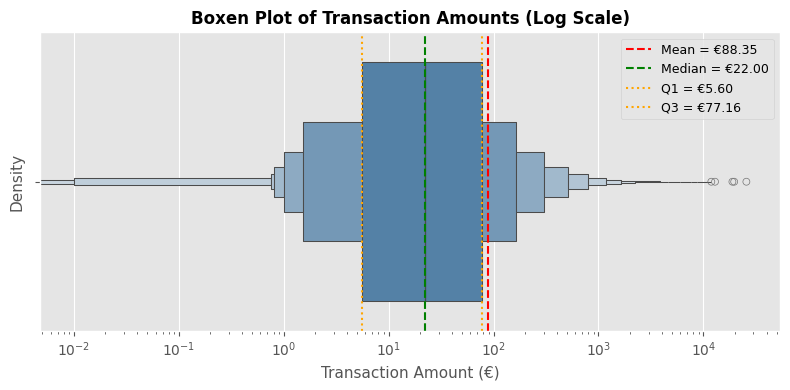

In [50]:
# Distribuição de valores (Amount)
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(8,4))
sns.boxenplot(data=df, x='Amount', color='steelblue')
plt.xscale('log')
plt.title("Boxen Plot of Transaction Amounts (Log Scale)", fontsize=12, fontweight='bold')
plt.xlabel("Transaction Amount (€)", fontsize=11)
plt.ylabel("Density", fontsize=11)

# 📊 Cálculo das principais estatísticas
mean_val = df['Amount'].mean()
median_val = df['Amount'].median()
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)

# ✏️ Adicionar linhas verticais e textos com os valores
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = €{mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = €{median_val:.2f}')
plt.axvline(q1, color='orange', linestyle=':', label=f'Q1 = €{q1:.2f}')
plt.axvline(q3, color='orange', linestyle=':', label=f'Q3 = €{q3:.2f}')

# 🏷️ Colocar legenda e formatação final
plt.legend(fontsize=9, loc='upper right', frameon=True)
plt.tight_layout()
plt.show()



💰 Insight: Distribution of Transaction Amounts

The distribution of transaction amounts is highly right-skewed, meaning that most transactions have very small values, while a few transactions involve significantly higher amounts.
The Boxen Plot clearly illustrates this imbalance: the central mass of data lies between approximately €5 and €80, whereas the presence of outliers extends up to several thousand euros.

The median value (€22) is far below the mean (€88), confirming that a small number of high-value transactions pull the average upward.
Such an asymmetric distribution is typical of real-world financial data, where small everyday purchases dominate and large payments are rare.

Using a logarithmic scale on the X-axis makes these patterns visible by spreading low-value transactions and compressing extreme ones.
This transformation allows for a better understanding of the data spread and will also be useful during model training, as it helps algorithms handle the wide numeric range of transaction values more effectively.

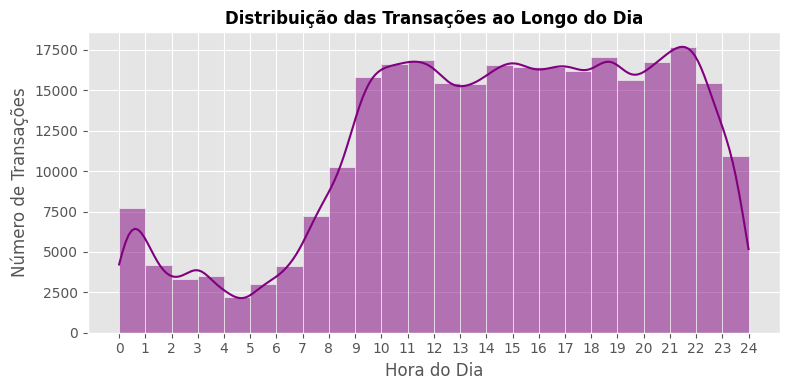

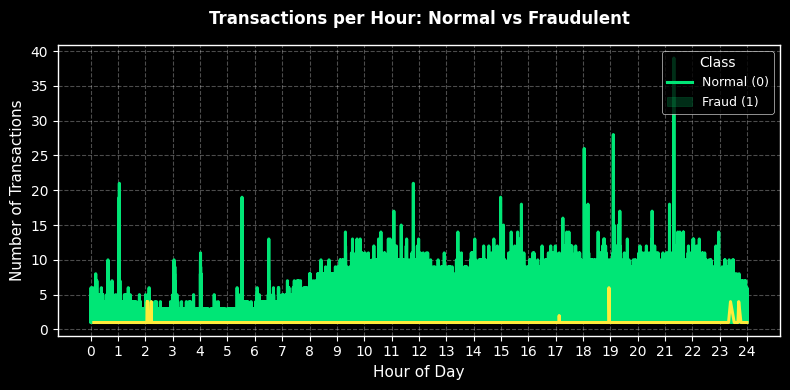

In [58]:
# Distribuição temporal (Time)
# Distribuição temporal (Time → Hour)
df['Hour'] = (df['Time'] / 3600) % 24  # converter para hora do dia

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Hour', bins=24, kde=True, color='purple')
plt.title("Distribuição das Transações ao Longo do Dia", fontsize=12, fontweight='bold')
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Transações")
plt.xticks(range(0, 25))
plt.tight_layout()
plt.show()




# Estilo escuro com contraste
plt.style.use('dark_background')

plt.figure(figsize=(8,4), facecolor='black')
sns.lineplot(
    data=hourly_counts,
    x='Hour',
    y='Count',
    hue='Class',
    palette=['#00E676', '#FFEB3B'],  # verde-claro = normal, amarelo = fraude
    linewidth=2.2
)

plt.title("Transactions per Hour: Normal vs Fraudulent", fontsize=12, fontweight='bold', color='white', pad=15)
plt.xlabel("Hour of Day", fontsize=11, color='white')
plt.ylabel("Number of Transactions", fontsize=11, color='white')

# Eixo e grade com alto contraste
plt.xticks(range(0, 25), color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)

# Legenda personalizada e com fundo transparente
plt.legend(
    title='Class',
    labels=['Normal (0)', 'Fraud (1)'],
    facecolor='black',
    edgecolor='white',
    fontsize=9,
    title_fontsize=10,
    loc='upper right'
)

plt.tight_layout()
plt.show()





🧠 Insight: Hourly Distribution of Fraudulent Transactions

The temporal analysis reveals that while normal transactions (Class 0) maintain a steady and continuous flow throughout the day, fraudulent transactions (Class 1) occur in short, concentrated bursts at specific times.
Notably, there are visible spikes around 2:00 AM–2:30 AM, 7:00 PM, and 11:30 PM, suggesting periods of higher fraudulent activity.
These time windows often correspond to low-monitoring periods or system load transitions, when automated fraud attempts or opportunistic behaviors are more likely to occur.

Even though the dataset represents two consecutive days of anonymized global transactions (not tied to a local timezone), this pattern highlights that time of day is a meaningful behavioral feature.
Incorporating the Hour variable into the model—preferably as cyclical features (using sine and cosine transformations)—can help the fraud detection system better capture temporal irregularities and identify abnormal activity.

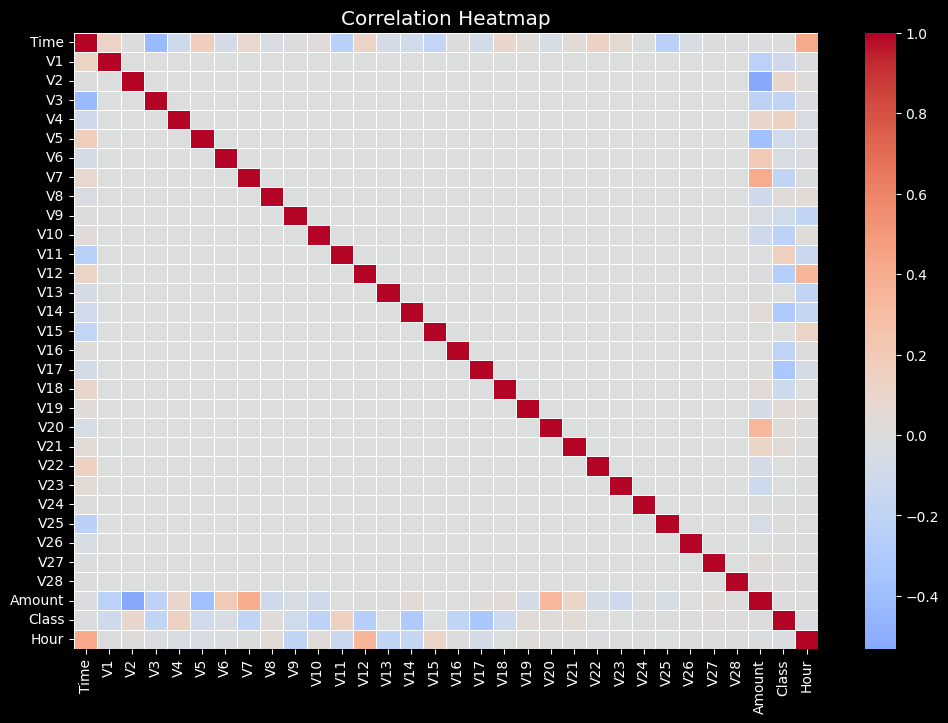

In [59]:
# Correlação
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


💬 Texto em inglês para colocar no notebook
🔍 Insight: Correlation Matrix Interpretation

The correlation heatmap shows that most features (V1–V28) are largely independent, with very low pairwise correlations — a result of the PCA transformation applied during preprocessing.
The strongest relationships with the target variable Class appear in features such as V17, V14, V10, and V4, although these correlations are still moderate.

Blue tones near the Class row indicate negative correlations (as these variables decrease, fraud likelihood increases), while orange tones indicate positive correlations (as these variables increase, so does the chance of fraud).

This independence among features ensures that the dataset is well-suited for supervised learning, as each variable contributes unique information without redundancy.